### Feature Extraction with Eigen Face

**Principle Component Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen Face
from sklearn.decomposition import PCA 

import pickle

In [2]:
# Load the data
data = pickle.load(open('./data/data_images_100_100.pickle',mode='rb')) # load the data

In [3]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.121569,0.098039,0.137255,0.098039,0.121569,0.113725,0.117647,0.121569,0.133333,0.133333,...,0.105882,0.086275,0.117647,0.086275,0.137255,0.078431,0.137255,0.254902,0.074510,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


##### Eigen Face

In [4]:
# Mean Face
X = data.drop('gender',axis=1).values # all images

In [5]:
X

array([[0.78431373, 0.74117647, 0.7372549 , ..., 0.45882353, 0.4627451 ,
        0.47843137],
       [0.12156863, 0.09803922, 0.1372549 , ..., 0.1372549 , 0.25490196,
        0.0745098 ],
       [0.19215686, 0.19215686, 0.1372549 , ..., 0.83137255, 0.82352941,
        0.81568627],
       ...,
       [0.69411765, 0.70196078, 0.70588235, ..., 0.61960784, 0.65098039,
        0.6745098 ],
       [0.14509804, 0.14509804, 0.14509804, ..., 0.27843137, 0.28235294,
        0.27843137],
       [0.71372549, 0.71764706, 0.72156863, ..., 0.74509804, 0.74509804,
        0.74509804]])

In [6]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(10000,)

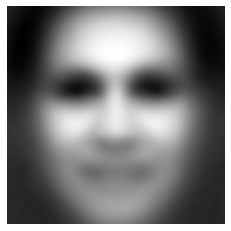

In [7]:
# visualize mean face
plt.imshow(mean_face.reshape((100,100)),cmap='gray')
plt.axis('off')
plt.show()

**Subtract data with mean face**

In [8]:
X_t = X - mean_face # transformed data

**Applying X_t data to PCA**

In [9]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [10]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.251699,0.251699,1
1,0.114162,0.365860,2
2,0.105622,0.471482,3
3,0.051887,0.523369,4
4,0.033064,0.556433,5


In [11]:
exp_var_df.set_index('principal_components',inplace=True)

<AxesSubplot:xlabel='principal_components'>

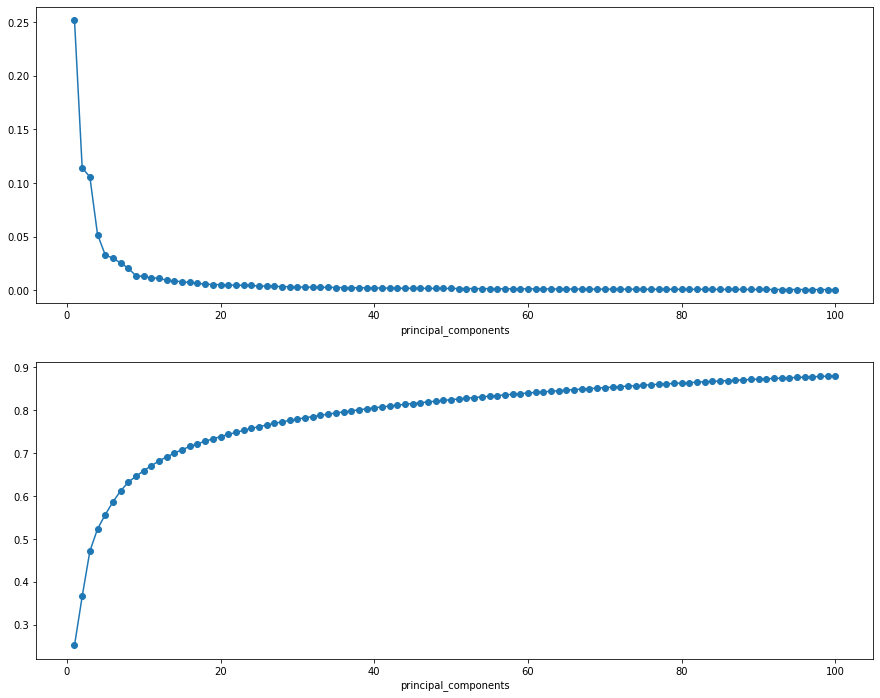

In [13]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

In [14]:
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
pca_data = pca_50.fit_transform(X_t)

In [15]:
pca_data.shape

(4319, 50)

In [18]:
# saving data and models
y = data['gender'].values # independent variables
np.savez('./data/data_pca_50_target',pca_data,y)

In [19]:
# saving the model
pca_dict = {'pca':pca_50,'mean_face':mean_face}

In [20]:
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

### Visualize Eigen Image

In [28]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [29]:
pca_data_inv.shape

(4319, 10000)

In [30]:
eig_img = pca_data_inv[0,:].reshape((100,100))
eig_img.shape

(100, 100)

(-0.5, 99.5, 99.5, -0.5)

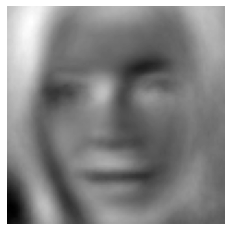

In [31]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

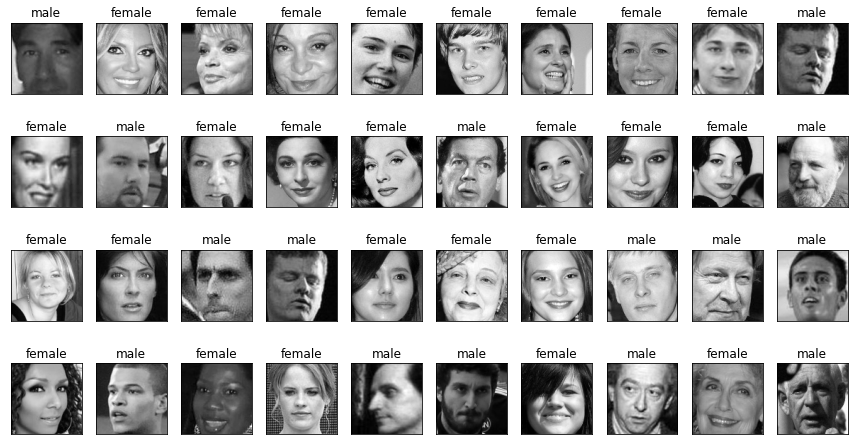

====================Eigen Images====================


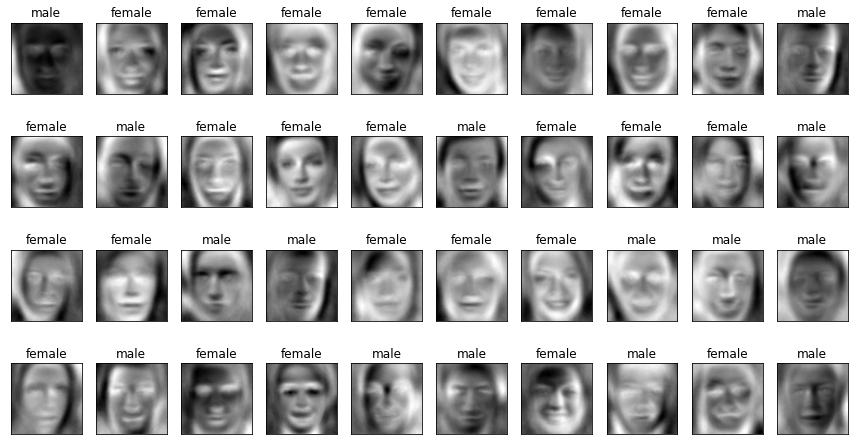

In [34]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()